In [2]:
# mengkoneksikan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import library
import pandas as pd
import numpy as np
#from datetime import date
from IPython.display import Image
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# cek isi folder
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks")
%ls

 alpha-miner.ipynb                heuristic-miner.ipynb   running-example.csv
'Copy of inductive-miner.ipynb'   inductive-miner.ipynb


In [5]:
# import dataset kedalam program python
event_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/running-example.csv', sep=';', low_memory=False)

In [6]:
# Melihat Ringkasan dataset
event_df.head()

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara


In [7]:
# melihat bentuk pada dataset
print('{} rows and {} columns.'.format(event_df.shape[0], event_df.shape[1]))

42 rows and 5 columns.


In [8]:
# melakukan pemilihan column yang digunakan dan membentuk dataset baru
events = event_df[['case_id', 'activity', 'timestamp']]

# merubah nama colum yang digunakan pada dataset
events.rename(columns={'case_id':'case',
                       'activity':'activity',
                       'timestamp':'datetime'
                       }, inplace=True)

# melihat ringkasan dataset
events.head()

,case,activity,datetime
0,3,register request,2010-12-30 14:32:00+01:00
1,3,examine casually,2010-12-30 15:06:00+01:00
2,3,check ticket,2010-12-30 16:34:00+01:00
3,3,decide,2011-01-06 09:18:00+01:00
4,3,reinitiate request,2011-01-06 12:18:00+01:00


In [9]:
# melihat type data pada dataset
events.dtypes

case         int64
activity    object
datetime    object
dtype: object

In [10]:
# merubah type data pada colum case menjadi string (object)
events['case'] = events.astype(str)

In [11]:
# merubah type data pada column datetime menjadi datetime
events['datetime'] = pd.to_datetime(events['datetime'])

In [12]:
# melihat type data pada dataset
events.dtypes

case                                      object
activity                                  object
datetime    datetime64[ns, pytz.FixedOffset(60)]
dtype: object

In [13]:
# melakukan pengecekan missing value pada dataset
events.isna().sum()

case        0
activity    0
datetime    0
dtype: int64

In [14]:
# Installasi modul PM4PY
!pip install pm4py

     |████████████████████████████████| 1.5 MB 4.2 MB/s 
     |████████████████████████████████| 40.6 MB 75 kB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23598 sha256=4208b884165c6f3c12f1671b62f2ad90e19b404cf2f04ddcc1cf4b9e1c51d782
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist


In [15]:
# rename field column
events.rename(columns={'datetime': 'time:timestamp', 'case': 'case:concept:name', 'activity': 'concept:name'}, inplace=True)


In [16]:
# define start activity label
from pm4py.algo.filtering.pandas.start_activities import start_activities_filter
log_start = start_activities_filter.get_start_activities(events)
df_start_activities = start_activities_filter.apply(events, ["register request"])

df_start_activities

,case:concept:name,concept:name,time:timestamp
0,3,register request,2010-12-30 14:32:00+01:00
1,3,examine casually,2010-12-30 15:06:00+01:00
2,3,check ticket,2010-12-30 16:34:00+01:00
3,3,decide,2011-01-06 09:18:00+01:00
4,3,reinitiate request,2011-01-06 12:18:00+01:00
5,3,examine thoroughly,2011-01-06 13:06:00+01:00
6,3,check ticket,2011-01-08 11:43:00+01:00
7,3,decide,2011-01-09 09:55:00+01:00
8,3,pay compensation,2011-01-15 10:45:00+01:00
9,2,register request,2010-12-30 11:32:00+01:00


In [17]:
# define end activity label
from pm4py.algo.filtering.pandas.end_activities import end_activities_filter
end_activities = end_activities_filter.get_end_activities(df_start_activities)
filtered_df = end_activities_filter.apply(df_start_activities, ["pay compensation", "reject request"])

filtered_df

,case:concept:name,concept:name,time:timestamp
0,3,register request,2010-12-30 14:32:00+01:00
1,3,examine casually,2010-12-30 15:06:00+01:00
2,3,check ticket,2010-12-30 16:34:00+01:00
3,3,decide,2011-01-06 09:18:00+01:00
4,3,reinitiate request,2011-01-06 12:18:00+01:00
5,3,examine thoroughly,2011-01-06 13:06:00+01:00
6,3,check ticket,2011-01-08 11:43:00+01:00
7,3,decide,2011-01-09 09:55:00+01:00
8,3,pay compensation,2011-01-15 10:45:00+01:00
9,2,register request,2010-12-30 11:32:00+01:00


In [18]:
from pm4py.statistics.traces.generic.pandas import case_statistics
variants_count = case_statistics.get_variant_statistics(filtered_df)
variants_count = sorted(variants_count, key=lambda x: x['case:concept:name'], reverse=True)

variants_count

[{'case:concept:name': 1,
  'variant': 'register request,examine thoroughly,check ticket,decide,reject request'},
 {'case:concept:name': 1,
  'variant': 'register request,examine casually,check ticket,decide,reinitiate request,examine thoroughly,check ticket,decide,pay compensation'},
 {'case:concept:name': 1,
  'variant': 'register request,examine casually,check ticket,decide,reinitiate request,check ticket,examine casually,decide,reinitiate request,examine casually,check ticket,decide,reject request'},
 {'case:concept:name': 1,
  'variant': 'register request,examine casually,check ticket,decide,pay compensation'},
 {'case:concept:name': 1,
  'variant': 'register request,check ticket,examine thoroughly,decide,reject request'},
 {'case:concept:name': 1,
  'variant': 'register request,check ticket,examine casually,decide,pay compensation'}]

In [19]:
df = pd.DataFrame(variants_count)

df

,variant,case:concept:name
0,"register request,examine thoroughly,check tick...",1
1,"register request,examine casually,check ticket...",1
2,"register request,examine casually,check ticket...",1
3,"register request,examine casually,check ticket...",1
4,"register request,check ticket,examine thorough...",1
5,"register request,check ticket,examine casually...",1


In [20]:
from pm4py.objects.conversion.log import converter as log_converter

# mengkonversi dataset csv kedalam bentuk format log XES
log = log_converter.apply(filtered_df)

log

[{'attributes': {'concept:name': '3'}, 'events': [{'concept:name': 'register request', 'time:timestamp': Timestamp('2010-12-30 14:32:00+0100', tz='pytz.FixedOffset(60)')}, '..', {'concept:name': 'pay compensation', 'time:timestamp': Timestamp('2011-01-15 10:45:00+0100', tz='pytz.FixedOffset(60)')}]}, '....', {'attributes': {'concept:name': '4'}, 'events': [{'concept:name': 'register request', 'time:timestamp': Timestamp('2011-01-06 15:02:00+0100', tz='pytz.FixedOffset(60)')}, '..', {'concept:name': 'reject request', 'time:timestamp': Timestamp('2011-01-12 15:44:00+0100', tz='pytz.FixedOffset(60)')}]}]

In [21]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(log)

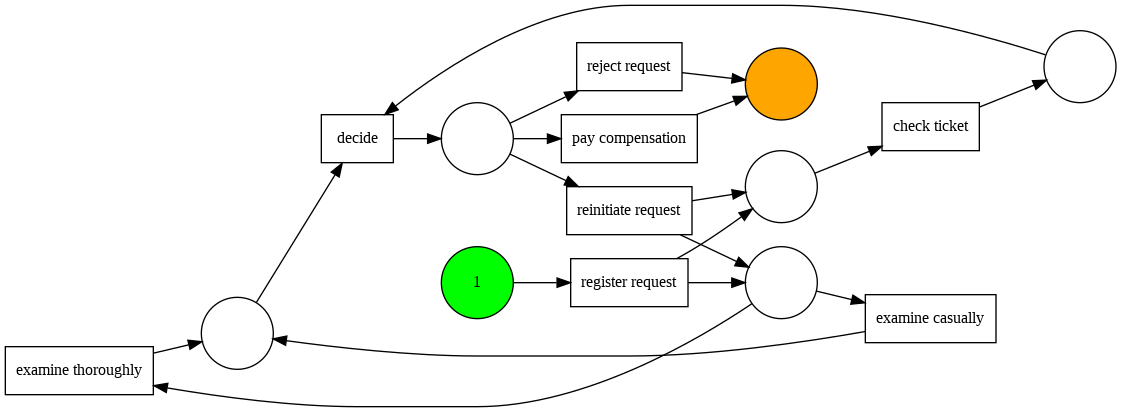

In [22]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

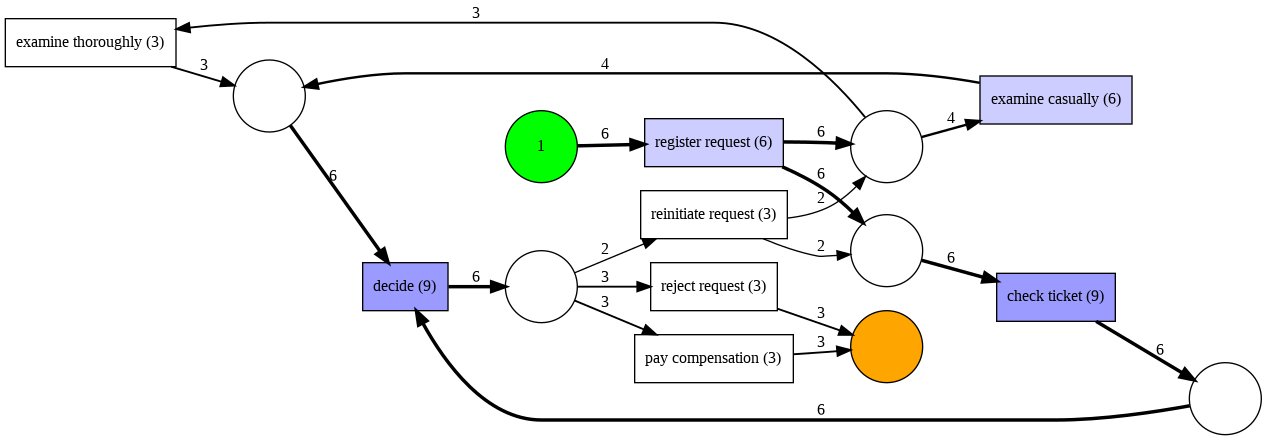

In [24]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY,log=log)
pn_visualizer.view(gviz)
